# Perkenalan

========================================================================

**Nama** : Ayman Baswedan


**Batch** : HCK-022


**Objective** :
Membangun model machine learning yang dapat memprediksi kemungkinan seseorang terkena penyakit jantung berdasarkan data input yang mencakup berbagai faktor risiko seperti usia, tekanan darah, kadar kolesterol, dan faktor-faktor lain yang relevan. Model ini bertujuan untuk membantu dalam deteksi dini penyakit jantung dan memberikan rekomendasi untuk langkah-langkah pencegahan.

metode yang di gunakan: 

1 - Logistic Regression 
2 - KNN
3 - SVM
4 - Decision Tree
5 - Random Forest
6 - Gradient Boosting

========================================================================





**Problem** : Ingin membuat model machine learning untuk memprediksi kemungkinan seseorang terkena penyakit jantung, sehingga dapat membantu dokter dalam mendeteksi risiko lebih awal dan memastikan pasien mendapatkan penanganan yang tepat.

**Justifikasi** :


1 - Tingginya Angka Kejadian dan Kematian Akibat Penyakit Jantung
Penyakit jantung merupakan penyebab utama kematian di dunia, terhitung sekitar 17,9 juta kematian setiap tahun menurut Organisasi Kesehatan Dunia (WHO)


2 - Kemajuan Teknologi yang Belum Diintegrasikan Secara Optimal di Bidang Kesehatan
Teknologi machine learning telah berkembang pesat dan semakin banyak digunakan di berbagai industri. Namun, adopsi teknologi ini dalam dunia kesehatan masih terbatas di beberapa negara berkembang, termasuk Indonesia. Padahal, potensi machine learning dalam meningkatkan akurasi prediksi kesehatan, efisiensi diagnosis, serta kualitas perawatan sangat besar.




**User** : Dokter Spesialis / Pasien

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Loading

In [3]:
# Read data
data = pd.read_csv('heart.csv')

# Tampilkan data
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Cek Missing value
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Cek Duplikat
data.duplicated().sum()

0

Dataset ini berisi informasi tentang pasien, yang dapat digunakan untuk memprediksi apakah mereka memiliki penyakit jantung atau tidak.

| Nama Kolom       | Tipe Data | Deskripsi                                                                 |
|-------------------|-----------|---------------------------------------------------------------------------|
| `Age`            | Numerik   | Usia pasien dalam tahun.                                                 |
| `Sex`            | Kategorikal | Jenis kelamin pasien: `M` untuk laki-laki, `F` untuk perempuan.          |
| `ChestPainType`  | Kategorikal | Tipe nyeri dada:                                                        |
|                   |           | - `TA`: Typical Angina (Angina khas).                                   |
|                   |           | - `ATA`: Atypical Angina (Angina tidak khas).                           |
|                   |           | - `NAP`: Non-Anginal Pain (Nyeri bukan angina).                        |
|                   |           | - `ASY`: Asymptomatic (Tidak bergejala).                                |
| `RestingBP`      | Numerik   | Tekanan darah istirahat dalam mmHg.                                      |
| `Cholesterol`    | Numerik   | Tingkat kolesterol serum dalam mg/dL.                                    |
| `FastingBS`      | Kategorikal | Kadar gula darah puasa: `1` jika >120 mg/dL, `0` jika ≤120 mg/dL.       |
| `RestingECG`     | Kategorikal | Hasil pemeriksaan elektrokardiografi istirahat:                         |
|                   |           | - `Normal`: Normal.                                                     |
|                   |           | - `ST`: Abnormalitas gelombang ST-T (contoh: inversi gelombang T).     |
|                   |           | - `LVH`: Menunjukkan hipertrofi ventrikel kiri.                         |
| `MaxHR`          | Numerik   | Detak jantung maksimum yang tercapai selama uji.                        |
| `ExerciseAngina` | Kategorikal | Angina yang dipicu oleh olahraga: `Y` (Ya), `N` (Tidak).                |
| `Oldpeak`        | Numerik   | Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat.      |
| `ST_Slope`       | Kategorikal | Kemiringan segmen ST:                                                   |
|                   |           | - `Up`: Kemiringan naik.                                                |
|                   |           | - `Flat`: Kemiringan datar.                                             |
|                   |           | - `Down`: Kemiringan turun.                                             |
| `HeartDisease`   | Kategorikal | Target prediksi: `1` jika pasien memiliki penyakit jantung, `0` jika tidak. |

---

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Age', ylabel='Density'>

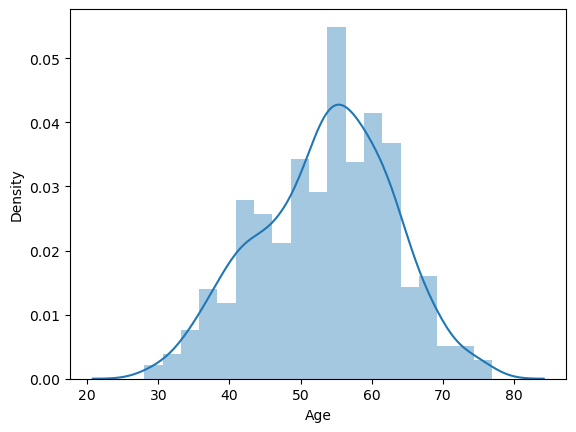

In [7]:
data['Age']

sns.distplot(data['Age'], kde = True, hist = True)

**Insight**: Usia termuda yang mempunyai masalah jantung adalah sekitar 30 tahun, dan tertua sekitar 80 tahun, tetapi sebagian besar data berkisar antara 40 hingga 70 tahun. Ini berarti bahwa orang-orang yang berusia antara 30 dan 80 tahun mungkin mengalami masalah jantung, tetapi mereka yang berusia antara 40 dan 70 tahun lebih sering terkena. Selain itu, individu yang berusia sekitar 55 tahun memiliki risiko tertinggi untuk mengalami masalah jantung.

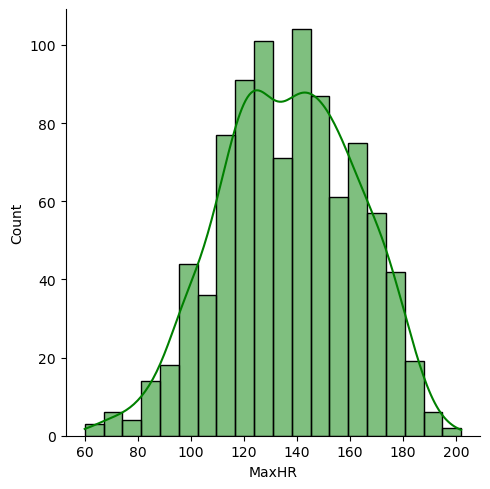

In [8]:
sns.displot(data['MaxHR'], kde = True, color = 'green')

**Insight**: terdapat 100+ orang yang memiliki MaxHR(Max Heart Rate) normal di sekitar 120-140

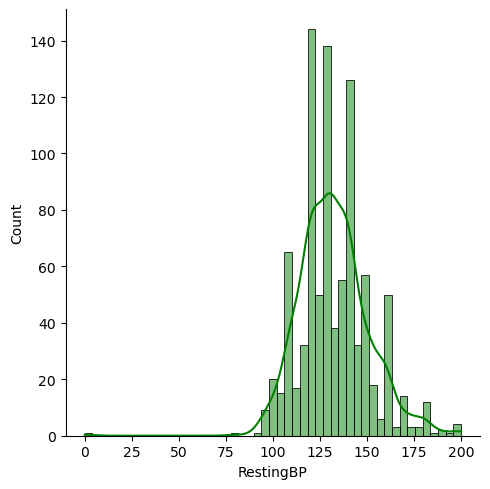

In [9]:
sns.displot(data['RestingBP'], kde = True, color = 'green')

**Insight**: RestingBP (resting Blood Pressure) datanya berada dalam kisaran 100 hingga 200 dan kurvanya dimulai dari 0 tetapi hanya terletak pada sumbu x, karena tekanan darah 0 tidak mungkin terjadi, dan tekanan darah tertinggi mencapai 140+

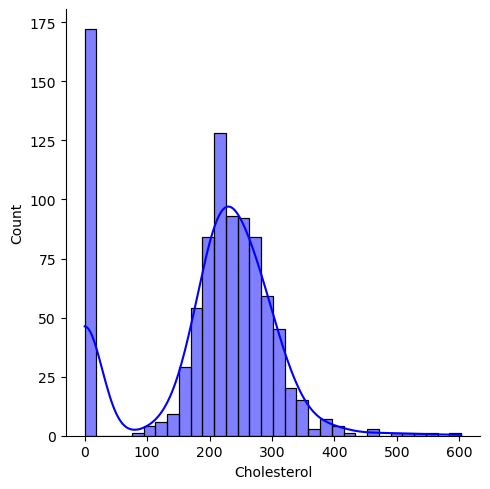

In [10]:
sns.displot(data['Cholesterol'], kde = True, color = 'blue')


**Insight**: KOLESTEROL, sebagian besar data menunjukkan angka 0, yang menunjukkan bahwa banyak orang memiliki kadar kolesterol 0. Namun, beberapa orang juga berada dalam kisaran 100 hingga 400

In [11]:
data.groupby('Sex').size()

Sex
F    193
M    725
dtype: int64

**Insigh**t: terdapat 193 perempuan, yaitu 21%, dan 725 laki-laki, yaitu 79% berdasarkan dataset ini

<Axes: >

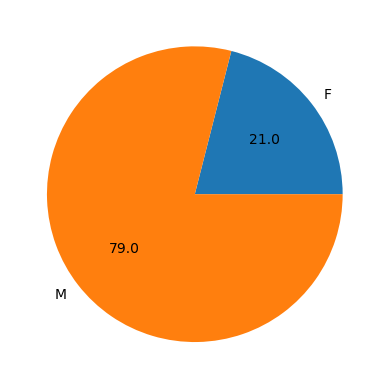

In [12]:
data.groupby('Sex').size().plot(kind = 'pie', autopct = '%0.1f')


**Insight**: Di dataset ini pasien yang ber jenis kelamin F (Wanita) itu 21% dan M (laki-laki) itu 79%

<Axes: >

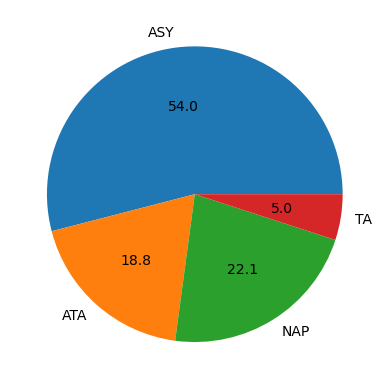

In [13]:
data.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f')

**Insight**: Sebagian besar pasien (54%) mengalami ASY (Asymptomatic) atau tanpa gejala nyeri dada yang jelas, meskipun berpotensi memiliki risiko penyakit jantung. Sementara itu, 22,1% mengalami NAP (Non-Anginal Pain), nyeri dada yang tidak terkait langsung dengan jantung.

Selain itu, 18,8% pasien melaporkan ATA (Atypical Angina), nyeri dada yang sulit dikaitkan langsung dengan angina klasik(berkurangnya aliran darah ke otot jantung). Hanya 5% pasien yang mengalami TA (Typical Angina), yaitu nyeri dada akibat penyakit jantung yang muncul saat aktivitas atau stres.

Mayoritas pasien berada dalam kategori ASY (Asymptomatic), yang menandakan tantangan dalam mendeteksi penyakit jantung dini. Penting untuk meningkatkan kesadaran terkait risiko tersembunyi pada pasien tanpa gejala jelas.

<Axes: >

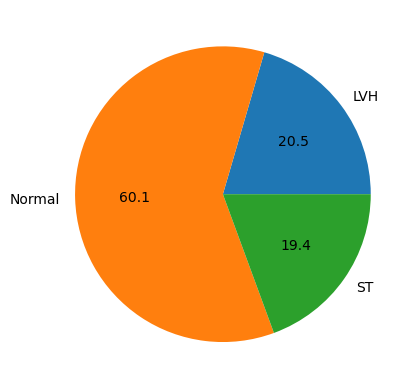

In [14]:
data.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.1f')

**Insight**: Mayoritas pasien (60,1%) memiliki hasil Normal pada pemeriksaan, menunjukkan tidak adanya kelainan. Namun, 20,5% menunjukkan tanda LVH (Left Ventricular Hypertrophy), kondisi di mana otot ventrikel kiri menebal, yang sering kali dikaitkan dengan hipertensi atau peningkatan beban kerja jantung.

Sementara itu, 19,4% pasien memiliki hasil ST, yang mengacu pada perubahan pada segmen ST di grafik elektrokardiogram (ECG). Segmen ini menggambarkan fase pemulihan jantung setelah kontraksi, dan perubahan ini bisa mengindikasikan adanya gangguan jantung seperti iskemia atau cedera jantung.

Sebagian besar hasil menunjukkan kondisi Normal, namun hampir 40% pasien mengalami potensi gangguan jantung seperti LVH atau ST. Deteksi dini dan pemantauan rutin penting dilakukan untuk mencegah komplikasi lebih lanjut.

# Feature Engineering

In [ ]:
# Split Data
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

## Split Data Train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# Pilih kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Periksa outlier menggunakan IQR untuk setiap kolom
outlier_info = []
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers),
        'Outliers Percent': len(outliers) / len(data) * 100
    })

# Buat DataFrame untuk informasi outlier
outlier_data = pd.DataFrame(outlier_info)
print(outlier_data)


         Column  Lower Bound  Upper Bound  Outliers Count  Outliers Percent
0           Age       27.500       79.500               0          0.000000
1     RestingBP       90.000      170.000              28          3.050109
2   Cholesterol       32.625      407.625             183         19.934641
3     FastingBS        0.000        0.000             214         23.311547
4         MaxHR       66.000      210.000               2          0.217865
5       Oldpeak       -2.250        3.750              16          1.742919
6  HeartDisease       -1.500        2.500               0          0.000000


## Cek Outlier

In [5]:
# Mengidentifikasi kolom numerik
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Mengecek outlier untuk setiap kolom numerik
outlier_summary = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_summary[col] = {
        "Total Outliers": outliers.shape[0],
        "Lower Bound": lower,
        "Upper Bound": upper
    }

# Konversi hasil outlier ke DataFrame
outlier_df = pd.DataFrame(outlier_summary)
outlier_df.reset_index(inplace=True)
outlier_df.rename(columns={'index': 'Column'}, inplace=True)
outlier_df



,Column,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,Total Outliers,0.0,28.0,183.000,214.0,2.0,16.00,0.0
1,Lower Bound,27.5,90.0,32.625,0.0,66.0,-2.25,-1.5
2,Upper Bound,79.5,170.0,407.625,0.0,210.0,3.75,2.5


## Handling Outlier

In [11]:
# Mengidentifikasi kolom numerik
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Fungsi untuk menangani outlier
def handle_outliers(data, column, method="remove", replacement_value=None):
    """
    method: "remove" untuk menghapus outlier, "replace" untuk mengganti outlier.
    replacement_value: Nilai pengganti jika method="replace".
    """
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, column)
    if method == "remove":
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == "replace":
        if replacement_value is None:
            # Default mengganti dengan median
            replacement_value = data[column].median()
        data.loc[data[column] < lower_bound, column] = replacement_value
        data.loc[data[column] > upper_bound, column] = replacement_value
    return data

# Mengecek outlier untuk setiap kolom numerik
outlier_summary = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_summary[col] = {
        "Total Outliers": outliers.shape[0],
        "Lower Bound": lower,
        "Upper Bound": upper
    }

# Konversi hasil outlier ke DataFrame
outlier_df = pd.DataFrame(outlier_summary).transpose()
outlier_df.reset_index(inplace=True)
outlier_df.rename(columns={'index': 'Column'}, inplace=True)

data_outhandling = pd.DataFrame(outlier_df)
data_outhandling


,Column,Total Outliers,Lower Bound,Upper Bound
0,Age,0.0,27.500,79.500
1,RestingBP,0.0,90.000,170.000
2,Cholesterol,26.0,160.375,311.375
3,FastingBS,0.0,0.000,0.000
4,MaxHR,0.0,66.000,210.000
5,Oldpeak,0.0,-2.250,3.750
6,HeartDisease,0.0,-1.500,2.500


In [16]:
# Cek cardinality (jumlah nilai unik) untuk setiap kolom
cardinality = pd.DataFrame({
    'Column': data.columns,
    'Unique Values': [data[col].nunique() for col in data.columns],
    'Data Type': [data[col].dtype for col in data.columns]
}).sort_values(by='Unique Values', ascending=False)

# Tampilkan hasil
print(cardinality)

            Column  Unique Values Data Type
4      Cholesterol            222     int64
7            MaxHR            119     int64
3        RestingBP             67     int64
9          Oldpeak             53   float64
0              Age             50     int64
2    ChestPainType              4    object
6       RestingECG              3    object
10        ST_Slope              3    object
1              Sex              2    object
5        FastingBS              2     int64
8   ExerciseAngina              2    object
11    HeartDisease              2     int64


## Feature Selection

In [13]:
# Data awal
data = {
    "Feature": ["Cholesterol", "MaxHR", "RestingBP", "Oldpeak", "Age",
                "ChestPainType", "RestingECG", "ST_Slope", "Sex", 
                "FastingBS", "ExerciseAngina", "HeartDisease"],
    "Unique Values": [222, 119, 67, 53, 50, 4, 3, 3, 2, 2, 2, 2],
    "Data Type": ["int64", "int64", "int64", "float64", "int64",
                  "object", "object", "object", "object", "int64", "object", "int64"]
}

import pandas as pd

df = pd.DataFrame(data)

# Filter kolom numerik (int64, float64) kecuali target
numerical_features = df[(df["Data Type"].isin(["int64", "float64"])) & (df["Feature"] != "HeartDisease")]["Feature"].tolist()

# Filter kolom kategorikal (object) dengan kategori unik lebih dari 2
categorical_features = df[(df["Data Type"] == "object") & (df["Unique Values"] > 2)]["Feature"].tolist()

# Gabungkan semua fitur yang dipilih
selected_features = numerical_features + categorical_features

print("Selected Features:", selected_features)


Selected Features: ['Cholesterol', 'MaxHR', 'RestingBP', 'Oldpeak', 'Age', 'FastingBS', 'ChestPainType', 'RestingECG', 'ST_Slope']


In [18]:
# Memisahkan kolom numerik dan kategorikal
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

## Pipeline Preprocessing

In [19]:
# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan pipeline numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


## Model Definition

In [21]:
# List Model
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


In [22]:
# Cross Validation
results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = (scores.mean(), scores.std())

# Print hasil
for model, (mean_acc, std_acc) in results.items():
    print(f"{model}: Akurasi rata-rata = {mean_acc:.2%}, Standar deviasi = {std_acc:.2%}")

KNN: Akurasi rata-rata = 85.01%, Standar deviasi = 1.15%
SVM: Akurasi rata-rata = 86.37%, Standar deviasi = 2.89%
Decision Tree: Akurasi rata-rata = 80.52%, Standar deviasi = 2.24%
Random Forest: Akurasi rata-rata = 84.33%, Standar deviasi = 2.67%
Gradient Boosting: Akurasi rata-rata = 85.01%, Standar deviasi = 2.25%


# Model Evaluation

In [23]:
# Model evaluation data Train
best_model = SVC(probability=True, random_state=42)  # Model terbaik dari evaluasi awal
final_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
final_clf.fit(X_train, y_train)

# Tes akurasi pada data Train
test_accuracy = final_clf.score(X_test, y_test)
print(f"Akurasi pada data uji: {test_accuracy:.2%}")

Akurasi pada data uji: 89.67%


# Hyperparameter tuning

## SVM Hyperparameter Tuning


In [24]:
svm_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

svm_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True, random_state=42))])
svm_grid = GridSearchCV(svm_clf, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

Best SVM Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best SVM Accuracy: 0.863703289534992


## Random Forest Hyperparameter Tuning

In [25]:
rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)

Best Random Forest Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Random Forest Accuracy: 0.859640294473954


## Gradient Boosting Hyperparameter Tuning

In [26]:
gb_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

gb_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier(random_state=42))])
gb_grid = GridSearchCV(gb_clf, gb_params, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best Gradient Boosting Accuracy:", gb_grid.best_score_)

Best Gradient Boosting Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best Gradient Boosting Accuracy: 0.8582704314602552


## KNN Hyperparameter Tuning

In [27]:
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

knn_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
knn_grid = GridSearchCV(knn_clf, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN Accuracy:", knn_grid.best_score_)

Best KNN Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Best KNN Accuracy: 0.862361382909328


##  Decision Tree Hyperparameter Tuning

In [28]:
dt_params = {
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

dt_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
dt_grid = GridSearchCV(dt_clf, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree Accuracy:", dt_grid.best_score_)

Best Decision Tree Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Best Decision Tree Accuracy: 0.8323921349361664


## Perbandingan Hasil Model

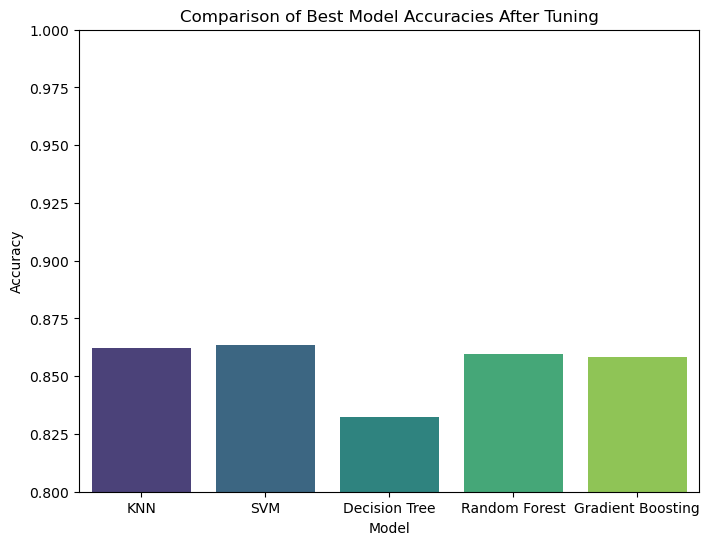

In [29]:
best_scores = {
    'KNN': knn_grid.best_score_,
    'SVM': svm_grid.best_score_,
    'Decision Tree': dt_grid.best_score_,
    'Random Forest': rf_grid.best_score_,
    'Gradient Boosting': gb_grid.best_score_
}

# Visualisasi hasil
plt.figure(figsize=(8, 6))
sns.barplot(x=list(best_scores.keys()), y=list(best_scores.values()), palette='viridis')
plt.title('Comparison of Best Model Accuracies After Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1)
plt.show()

# Best Model

In [30]:
best_model = rf_grid.best_estimator_
best_model.fit(X_train, y_train)

# Evaluasi pada data uji
test_accuracy = best_model.score(X_test, y_test)
print(f"Akurasi terbaik pada data uji: {test_accuracy:.2%}")

Akurasi terbaik pada data uji: 89.13%


# Model Inference

In [31]:
final_model = rf_grid.best_estimator_

# Model saving

In [32]:
import pickle

model_path = 'final_heart_disease_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(final_model, f)
print(f"Model disimpan di: {model_path}")

Model disimpan di: final_heart_disease_model.pkl


In [33]:
with open('final_heart_disease_model.pkl','rb') as o:
        open_file = pickle.load(o)

## Model Inference 

In [34]:
# Contoh beberapa data baru (DataFrame)
batch_data = pd.DataFrame([
    {
        'Age': 45,
        'Sex': 'F',
        'ChestPainType': 'ATA',
        'RestingBP': 120,
        'Cholesterol': 210,
        'FastingBS': 0,
        'RestingECG': 'Normal',
        'MaxHR': 170,
        'ExerciseAngina': 'N',
        'Oldpeak': 0.0,
        'ST_Slope': 'Up'
    },
    {
        'Age': 60,
        'Sex': 'M',
        'ChestPainType': 'ASY',
        'RestingBP': 140,
        'Cholesterol': 300,
        'FastingBS': 1,
        'RestingECG': 'ST',
        'MaxHR': 130,
        'ExerciseAngina': 'Y',
        'Oldpeak': 2.3,
        'ST_Slope': 'Flat'
    }
])

# Prediksi batch
predictions = open_file.predict(batch_data)

# Tampilkan hasil
results = pd.DataFrame({
    'Prediction': ['Heart Disease' if p == 1 else 'No Heart Disease' for p in predictions],
})
print(results)


         Prediction
0  No Heart Disease
1     Heart Disease


# Conceptual Problems

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging

**Latar Belakang**:
Bagging adalah salah satu metode ensemble dalam machine learning yang bertujuan untuk meningkatkan performa model, terutama dengan mengurangi variance. Metode ini diperkenalkan oleh Leo Breiman pada tahun 1996 sebagai solusi untuk meningkatkan stabilitas dan akurasi model prediksi.

**Cara Kerja**:

1 - Buat beberapa subset data: Ambil sampel acak dari data train untuk membuat beberapa subset.

2 - Train model: Train model yang sama pada setiap subset data yang berbeda.

3 - Gabungkan hasilnya: Setelah model-model tersebut selesai, gabungkan prediksi mereka.

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih

**Random Forest**: Membangun banyak pohon secara bersamaan dan menggabungkannya.

**Boosting**: Membangun model secara berurutan, memperbaiki kesalahan model sebelumnya.

Random Forest cenderung lebih fokus pada mengurangi variance, sementara Boosting berfokus pada mengurangi bias dan meningkatkan akurasi.

## 3. Jelaskan apa yang dimaksud dengan Cross Validation

**Cross-validation** adalah teknik evaluasi model dalam machine learning yang digunakan untuk mengukur kemampuan model terhadap data yang baru. Tujuan utamanya adalah memastikan apakah model sudah bagus untuk di pakai.

# Kesimpulan

Kode yang diberikan melakukan analisis dan pemodelan data penyakit jantung.  

Dimulai dengan(EDA) untuk memahami distribusi usia, tekanan darah, kolesterol, dan variabel lainnya, serta proporsi jenis kelamin dan jenis nyeri dada. 

Kemudian, dilakukan handling outlier pada data numerik dengan metode penghapusan atau penggantian nilai.  Selanjutnya, data dibagi menjadi data train dan data test.  Beberapa model klasifikasi (KNN, SVM, Decision Tree, Random Forest, Gradient Boosting) dievaluasi menggunakan *cross-validation* untuk menentukan model terbaik.  

Model terbaik (Random Forest) lalu di-*tuning* hyperparameternya menggunakan *GridSearchCV* untuk meningkatkan akurasi. 

Model hasil *tuning* dievaluasi pada data train, lalu disimpan. Terakhir, 

dilakukan model inference dengan data baru untuk memprediksi kemungkinan penyakit jantung dikemas dalam bentuk tabel.  

Selain itu, juga menjelaskan konsep *bagging*, perbedaan antara Random Forest dan Boosting, serta *cross-validation*.

Kesimpulannya, kode ini membangun model prediktif untuk mendiagnosis penyakit jantung dengan akurasi yang cukup tinggi setelah melalui proses analisis, pembersihan data, dan optimasi model.
